In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv(r'cardio_train.csv', sep = "\;", engine = 'python')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Let's convert the data into long format and depict the value counts of the categorical features.

In [4]:
df2 = pd.melt(frame = df, value_vars = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
df2 = pd.DataFrame(df2.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
df2

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


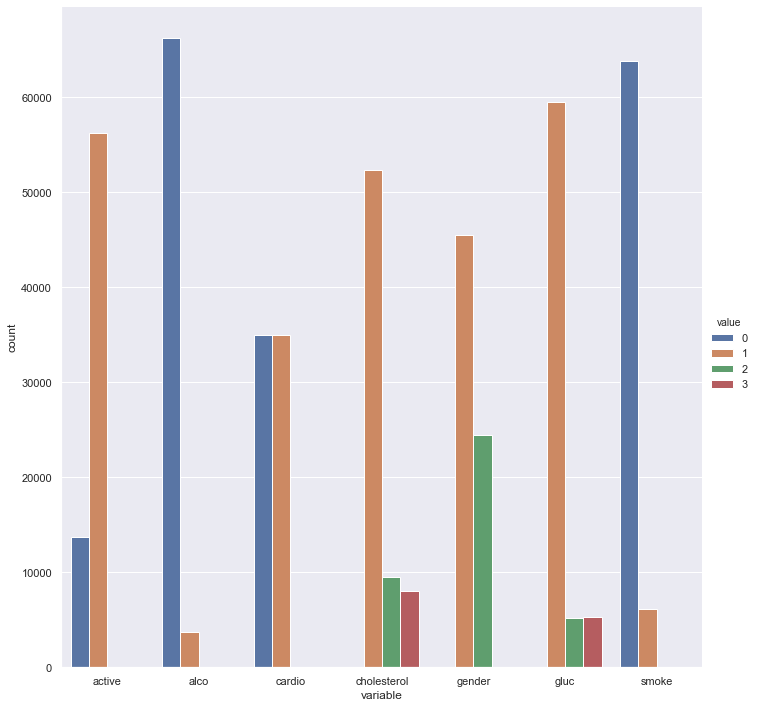

In [5]:
sns.catplot(x='variable', y='count', hue='value',  data=df2, kind='bar', height = 10)

Let's split the dataset by target values. 

In [6]:
df3 = pd.melt(frame = df, value_vars = ['active', 'alco', 'cholesterol', 'gender', 'gluc', 'smoke'], id_vars = 'cardio')
df3 = pd.DataFrame(df3.groupby(['variable', 'value', 'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
df3

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


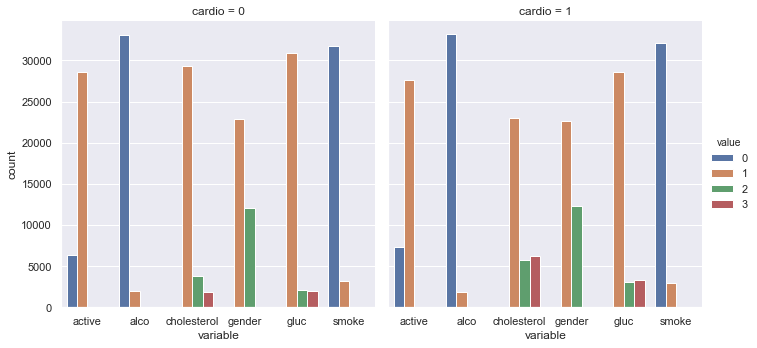

In [7]:
sns.catplot(x = 'variable', y = 'count', hue = 'value', col = 'cardio', data = df3, kind = 'bar')

### How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [8]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [9]:
df[['gender', 'height']].groupby('gender').mean()

,height
gender,
1,161.355612
2,169.947895


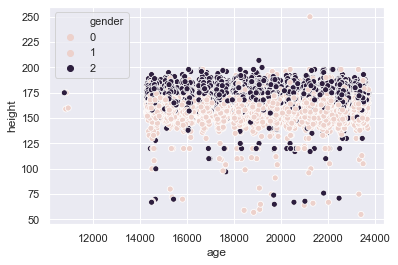

In [10]:
sns.scatterplot(df.age, df.height, hue = 'gender', data =df)

Assuming that men are generally taller than women 1 stands for women and 2 for men. Thus we have 45 530 female and 24 470 male

### Which gender more often reports consuming alcohol - men or women?

In [11]:
pd.crosstab(df.gender, df.alco)

alco,0,1
gender,,
1,44369,1161
2,21867,2603


In [12]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Men tend to consume more alcohol

### What is the difference between the percentages of smokers among men and women?

In [13]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [14]:
round(abs(df[df['gender'] == 1]['smoke'].mean() - df[df['gender'] == 2]['smoke'].mean())*100)

20

### What is the difference between median values of age for smokers and non-smokers (in months, rounded)?

In [15]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [16]:
round(abs((df[df['smoke'] == 0]['age'].median() / 365.25) - (df[df['smoke'] == 1]['age'].median() / 365.25)) * 12)

20

### Calculate age_years feature – round age to the nearest number of years. 

In [17]:
df['age_years'] = df['age'].apply(lambda x: round(x / 365.25))

In [18]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


Let's take a look at the upper-right rectangle, which shows a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in the figure represent the upper bound).

We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

Let's calculate that same ratio using our data.



### Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [19]:
group = df[(df['age_years'] >= 60) & (df['age_years'] < 65) & (df['gender'] == 2) & (df['smoke'] == 1)]

In [20]:
cyst_120 = group[(group['cholesterol'] == 1) & (group['ap_hi'] <= 120)]['cardio'].mean()
cyst_160_180 = group[(group['cholesterol'] == 3) & (group['ap_hi'] >= 160) & (group['ap_hi'] < 180)]['cardio'].mean()

In [21]:
cyst_160_180 / cyst_120

2.6268939393939394

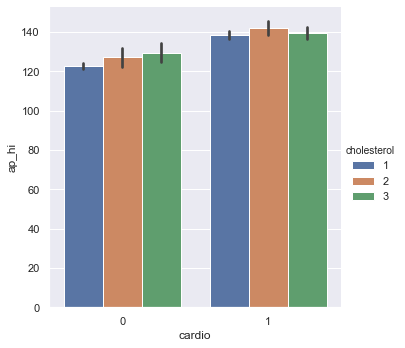

In [22]:
sns.catplot(x = 'cardio', y = 'ap_hi', data = group, hue = 'cholesterol', kind = 'bar')

### Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [23]:
df['BMI'] = df['weight']/((df['height']/100)**2)

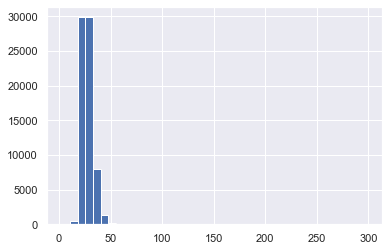

In [24]:
df['BMI'].hist(bins = 40)

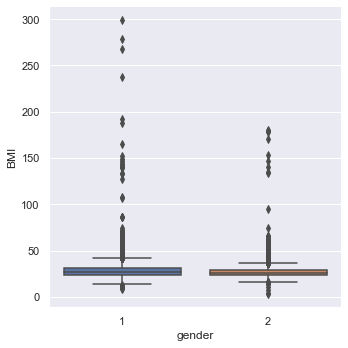

In [25]:
sns.catplot(x = 'gender', y = 'BMI', data = df, kind = 'box')

In [26]:
df['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [27]:
df['BMI'].median()

26.374068120774975

In [28]:
df.groupby('gender')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,27.987583,6.495638,8.001829,23.875115,26.709402,31.044558,298.666667
2,24470.0,26.754442,5.162752,3.471784,23.781213,25.910684,29.043709,180.678074


In [29]:
df.groupby('cardio')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,35021.0,26.548175,5.606469,7.022248,23.388687,25.476660,28.763971,237.768633
1,34979.0,28.566061,6.383666,3.471784,24.489796,27.471384,31.555556,298.666667


In [30]:
df.groupby(['cardio', 'gender'])['BMI'].agg(['mean', 'median', 'std'])

mean     median       std
cardio gender                                
0      1       26.891787  25.711662  5.883630
       2       25.897847  25.142857  4.976057
1      1       29.097819  27.915519  6.886355
       2       27.593300  26.775510  5.204562

Since normal BMI values are said to be from 18.5 to 25, we can conclude that median BMI in the sample is higher than normal BMI values. 
The BMI for women is on average higher than for men. 
Healthy people have, on average, a lower BMI than the people with CVD. 
For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

### Cleaning data
Task:
We can see that the data is not perfect. It contains "dirt" and inaccuracies. We'll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

    diastolic pressure is higher than systolic
    height is strictly less than 2.5 percentile
    height is strictly more than 97.5 percentile
    weight is strictly less than 2.5 percentile
    weight is strictly more than 97.5 percentile
This is not everything that we can do to clean this data, but this is sufficient for now.

In [31]:
df.shape

(70000, 15)

In [32]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


In [33]:
df_cleaned = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

In [34]:
df_cleaned.shape

(63259, 15)

In [35]:
df_cleaned.shape[0]/df.shape[0]

0.9037

We throw away around 10% of the original dataset

### Which pair of features has the strongest Pearson's correlation with the gender feature?

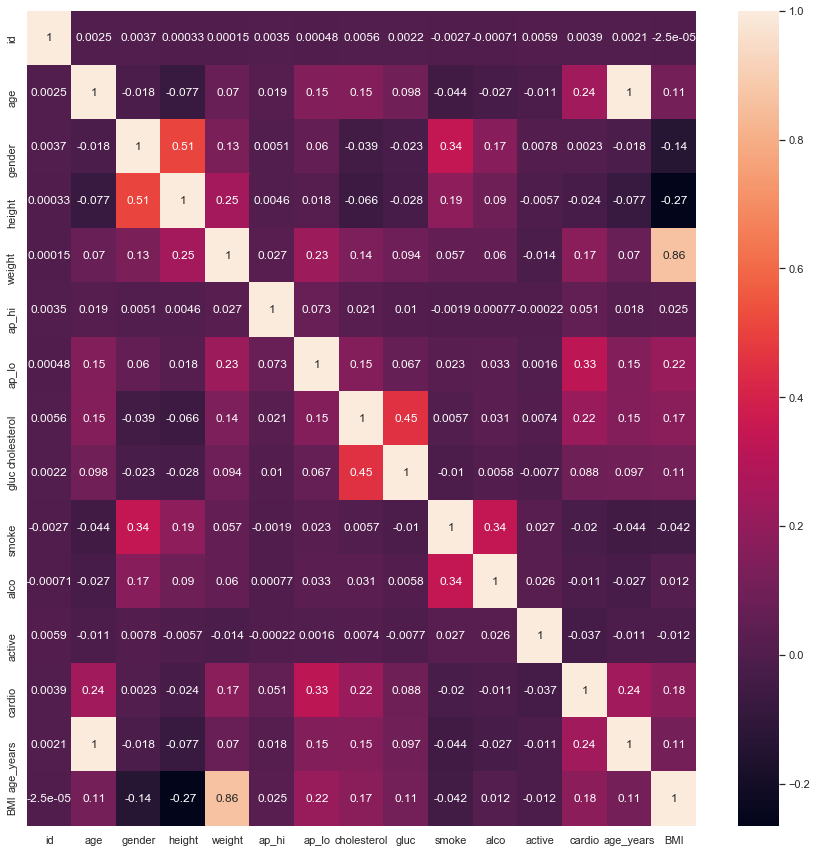

In [36]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_cleaned.corr(method = 'pearson'), annot=True)

Gender has the strongest correlation with height and smoke.

### Which pair of features has the strongest Spearman correlation?

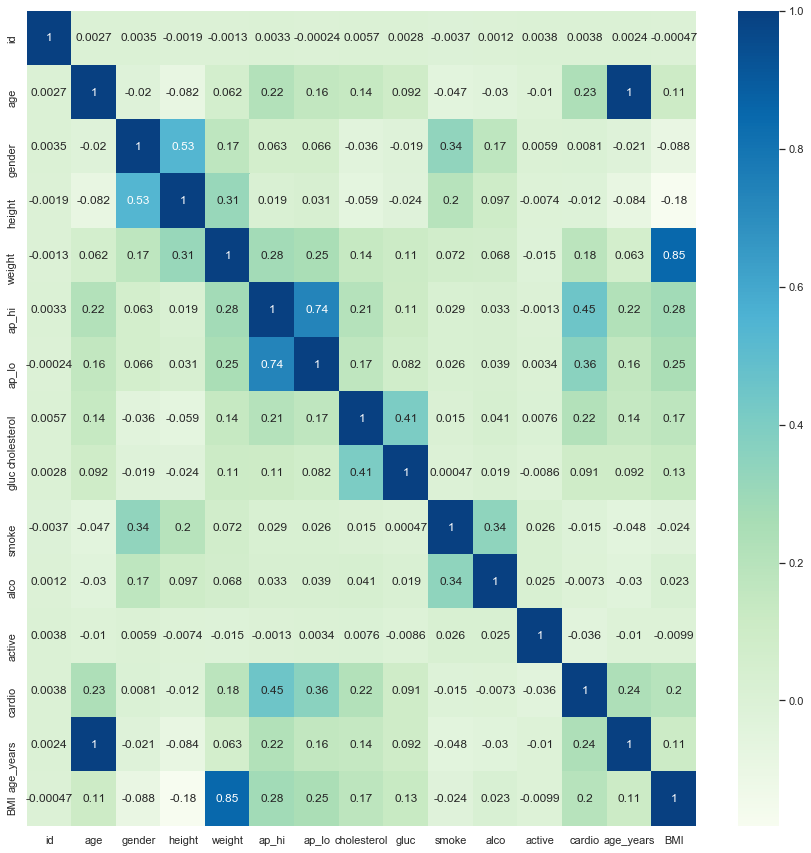

In [37]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'GnBu')

The stongest Spearman correlation are found between weight and BMI, systolic and diastolic blood pressure, and height and gender respectively.

### Height distribution of men and women

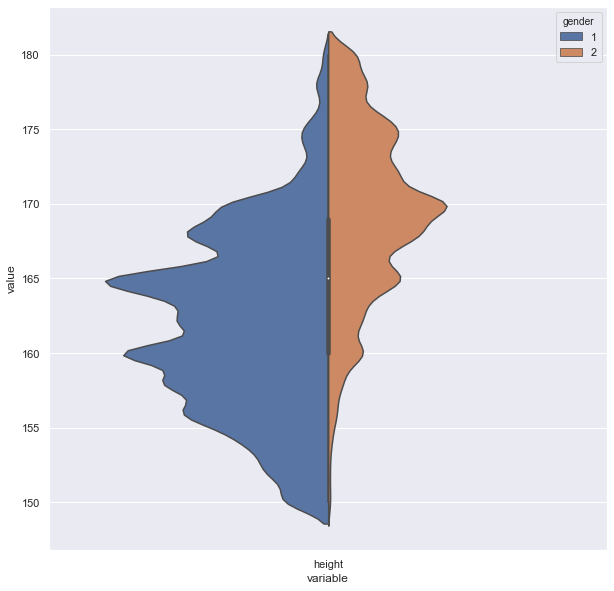

In [38]:
df_melted = pd.melt(frame = df_cleaned, value_vars = ['height'], id_vars = ['gender'])
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'variable', y = 'value', hue = 'gender', data = df_melted, scale = 'count', split = True)

### What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

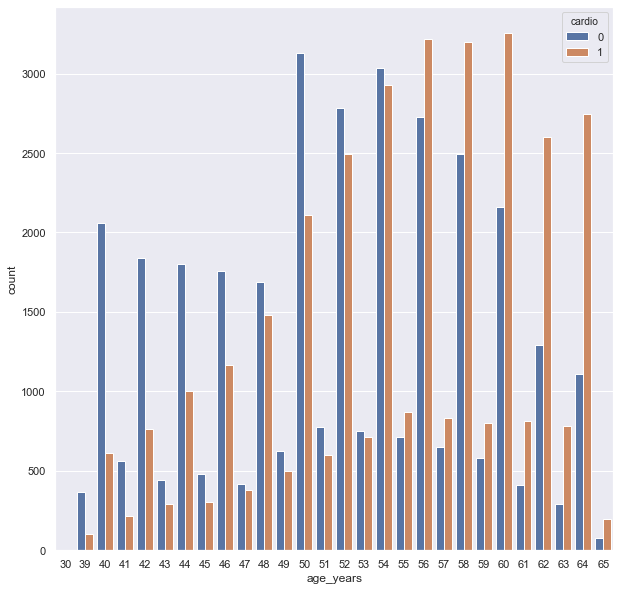

In [39]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'age_years', hue = 'cardio', data = df)

Starting with 55 years number of people with CVD outweights those with no CVD